In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [4]:
data = pd.read_csv("stroke.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Cleaning of data

From the data, we see that there are null values in the smoking_status column

The description of the columns are as follows:

Column | Description | Info
:-|:-|:-
id| Patient ID number    
gender| Gender of the patient| ("Male", "Female" or "Other")
age| Age of the patient | 
hypertension| Whether the patient has hypertension| (0: No hypertension, 1: Has hypertension)   
heart_disease| Whether the patient has heart disease| (0: No heart disease, 1: Has heart disease)
ever_married| Whether the patient is married| ("No" or "Yes")
work_type| Working type of patient| ("children", "Govt_job", "Never_worked", "Private" or "Self-employed")
Residence_type| Resident type of patient| ("Rural" or "Urban")
avg_glucose_level| Average glucose level in blood of patient
bmi| Body Mass Index of patient
smoking_status| Whether patient smoke| ("formerly smoked", "never smoked", "smokes" or "Unknown")
stroke| Whether the patient has a stroke| (0: No stroke, 1: Has stroke)

In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Observations
With 43400 data points, the dataset has a sufficient number of data points. Generally the dataset looks fine.

However, in order to resolve the following issues with the dataset, we still need to do the following:
* Handling unbalanced data
* Remove unnecessary columns
* Encoding gender column
* Remove outliers
* Categorising the glucose_level column
* Filling the NULL data in some of the columns

---

# Handling unbalanced data
From the dataset, we see that a significant amount of patients do not have stroke. This causes an imbalance in the data. To resolve this issue, we perform random under-sampling on the patients without stroke

In [7]:
# class count
class_count_0, class_count_1 = data['stroke'].value_counts()

# Separate class
class_0 = data[data['stroke'] == 0]
class_1 = data[data['stroke'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (42617, 12)
class 1: (783, 12)


total class of 1 and 0: 0    783
1    783
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'count (stroke)'}>

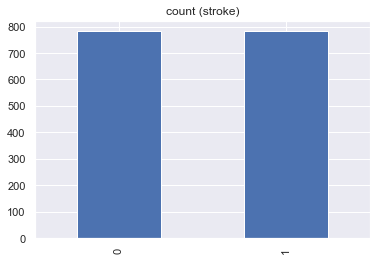

In [8]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['stroke'].value_counts())# plot the count after under-sampeling
test_under['stroke'].value_counts().plot(kind='bar', title='count (stroke)')

In [9]:
data = test_under.copy()

# Cleaning of data

### Removing unnecessary columns
In order to match the variables in the cardiovascular dataset, we remove the unnecessary variables 

In [10]:
for i in ['id', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']:
    data.drop([i], axis='columns', inplace=True)

data.head()

,gender,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke
8156,Female,33.0,0,65.04,22.9,never smoked,0
5434,Female,16.0,0,58.52,22.5,never smoked,0
14526,Male,48.0,0,72.84,21.7,never smoked,0
16335,Female,35.0,0,81.88,22.3,never smoked,0
25039,Female,79.0,1,93.57,28.8,never smoked,0


### Removing outliers
We notice that in the age, avg_glucose_level and bmi columns, the min and max have unrealistic values.
We assume that 5% of the dataset are outliers, and remove the entries that lie in the top 2.5% and bottom 2.5%, this will remove the unrealistic min and max values as well

In [11]:
age_outliers = data[(data['age'] > data['age'].quantile(0.975)) | 
                  (data['age'] < data['age'].quantile(0.025))].index

glucose_outliers = data[(data['avg_glucose_level'] > data['avg_glucose_level'].quantile(0.975)) | 
                  (data['avg_glucose_level'] < data['avg_glucose_level'].quantile(0.025))].index

bmi_outliers   = data[(data['bmi'] > data['bmi'].quantile(0.975)) | 
                  (data['bmi'] < data['bmi'].quantile(0.025))].index

In [12]:
toremove = set(list(age_outliers) + list(glucose_outliers) + list(bmi_outliers))

data.drop(toremove, inplace=True)
data.describe()

,age,hypertension,avg_glucose_level,bmi,stroke
count,1399.000000,1399.000000,1399.000000,1239.000000,1399.000000
mean,56.864189,0.173695,116.388513,29.316061,0.518942
std,20.293980,0.378983,50.981282,6.064639,0.499820
min,4.000000,0.000000,59.320000,17.200000,0.000000
25%,43.000000,0.000000,79.070000,25.100000,0.000000
50%,61.000000,0.000000,96.590000,28.600000,1.000000
75%,75.000000,0.000000,137.305000,33.100000,1.000000
max,82.000000,1.000000,238.190000,47.600000,1.000000


### Encoding gender column

In [13]:
data['gender'].describe()

count       1399
unique         2
top       Female
freq         820
Name: gender, dtype: object

In [14]:
# For those whose gender is other, we will assume they are female. 
# This is because both datasets contain more females to males, we follow the majority gender.

data.replace(to_replace=r'Other', value='Female', regex=True, inplace=True)

#Check that there are only 2 unique values after replacing
data['gender'].describe()

count       1399
unique         2
top       Female
freq         820
Name: gender, dtype: object

In [15]:
#Encoding the Gender variable
genders = pd.get_dummies(data.gender)
genders.rename(columns={"Female": "female", "Male": "male"}, inplace=True)

#Concat to our original dataframe
data = pd.concat([data, genders], axis=1)
data = data.drop(["gender"], axis=1)
data.head()

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,female,male
8156,33.0,0,65.04,22.9,never smoked,0,1,0
14526,48.0,0,72.84,21.7,never smoked,0,0,1
16335,35.0,0,81.88,22.3,never smoked,0,1,0
25039,79.0,1,93.57,28.8,never smoked,0,1,0
9529,58.0,0,207.87,32.4,never smoked,0,0,1


### Chaning age to int64 type

In [16]:
data['age'] = data['age'].astype(np.int64)

data.head()

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke,female,male
8156,33,0,65.04,22.9,never smoked,0,1,0
14526,48,0,72.84,21.7,never smoked,0,0,1
16335,35,0,81.88,22.3,never smoked,0,1,0
25039,79,1,93.57,28.8,never smoked,0,1,0
9529,58,0,207.87,32.4,never smoked,0,0,1


### Categorising the glucose_level column

![title](img/glucose.png)

From the above table, we use the fasting glucose_level column as we assume the patients took the
measurements when fasting.
We can categorise the glucose levels as follows:
* Normal (<= 100): 1       
* Pre-diabetic (101-125): 2 
* Diabetic (>= 126): 3     

In [17]:
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: 1 if x <= 100 else 2 if x <= 125 else 3)
data.rename(columns={"avg_glucose_level": "gluc"}, inplace=True)

data.head()

,age,hypertension,gluc,bmi,smoking_status,stroke,female,male
8156,33,0,1,22.9,never smoked,0,1,0
14526,48,0,1,21.7,never smoked,0,0,1
16335,35,0,1,22.3,never smoked,0,1,0
25039,79,1,1,28.8,never smoked,0,1,0
9529,58,0,3,32.4,never smoked,0,0,1


### Filling the NULL data in some of the columns

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 8156 to 43339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1399 non-null   int64  
 1   hypertension    1399 non-null   int64  
 2   gluc            1399 non-null   int64  
 3   bmi             1239 non-null   float64
 4   smoking_status  1079 non-null   object 
 5   stroke          1399 non-null   int64  
 6   female          1399 non-null   uint8  
 7   male            1399 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(2)
memory usage: 79.2+ KB


We notice that there are NULL values in bmi and smoking status

In [19]:
data.isnull().sum()

age                 0
hypertension        0
gluc                0
bmi               160
smoking_status    320
stroke              0
female              0
male                0
dtype: int64

In [20]:
# We fill the null values in bmi using the mean, since we have previously removed the outliers in the dataset
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 8156 to 43339
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1399 non-null   int64  
 1   hypertension    1399 non-null   int64  
 2   gluc            1399 non-null   int64  
 3   bmi             1399 non-null   float64
 4   smoking_status  1079 non-null   object 
 5   stroke          1399 non-null   int64  
 6   female          1399 non-null   uint8  
 7   male            1399 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(2)
memory usage: 79.2+ KB


In [21]:
# For smoking status, we take a look at the different values
data['smoking_status'].value_counts()

never smoked       523
formerly smoked    338
smokes             218
Name: smoking_status, dtype: int64

never smoked will be replaced with 0 (non-smoker), while formerly smoked and formerly smoked will be replaced with 1 (smoker).
We will treat null values as non-smokers

In [22]:
mapping = {"never smoked": 0, "formerly smoked": 1, "smokes": 1}

#mapping maps the value to the categorical value, NaN values will be defaulted to 0
data['smoking_status'] = data['smoking_status'].apply(lambda x: mapping.get(x, 0))
data.rename(columns={"smoking_status": "smoke"}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 8156 to 43339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1399 non-null   int64  
 1   hypertension  1399 non-null   int64  
 2   gluc          1399 non-null   int64  
 3   bmi           1399 non-null   float64
 4   smoke         1399 non-null   int64  
 5   stroke        1399 non-null   int64  
 6   female        1399 non-null   uint8  
 7   male          1399 non-null   uint8  
dtypes: float64(1), int64(5), uint8(2)
memory usage: 79.2 KB


In [23]:
for i in ['gluc', 'smoke', 'stroke', 'hypertension', 'female', 'male']:
    data[i] = data[i].astype("category")

In [24]:
data = data[['age', 'gluc', 'smoke', 'bmi', 'hypertension', 'female', 'male', 'stroke']]
data

,age,gluc,smoke,bmi,hypertension,female,male,stroke
8156,33,1,0,22.900000,0,1,0,0
14526,48,1,0,21.700000,0,0,1,0
16335,35,1,0,22.300000,0,1,0,0
25039,79,1,0,28.800000,1,1,0,0
9529,58,3,0,32.400000,0,0,1,0
...,...,...,...,...,...,...,...,...
43148,56,1,1,32.900000,0,1,0,1
43268,69,1,0,28.000000,0,0,1,1
43304,80,1,0,26.700000,0,1,0,1
43318,62,1,1,31.500000,1,0,1,1


---

# Predicting cardio variable
We will use back our model after hypertuning the variables, and use our data in cardio.csv as the train data.   
Subsequently, we will predict whether the patient has cardiovascular disease in our current stroke dataset

In [25]:
#Retrive cardio dataset from the other notebook

%store -r cardio
%store -r final_cl

In [26]:
cardio.head()

,age,gluc,smoke,cardio,bmi,hypertension,female,male
0,50,1,0,0,21.967120,0,0,1
1,55,1,0,1,34.927679,1,1,0
2,51,1,0,1,23.507805,0,1,0
3,48,1,0,1,28.710479,1,0,1
4,47,1,0,0,23.011177,0,1,0


In [27]:
import xgboost as xgb

X, y = cardio.copy().drop('cardio', axis=1), cardio.cardio

final_cl.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              disable_default_eval_metric=True, enable_categorical=True,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=1.5, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [28]:
tempX = data.drop('stroke', axis=1)
predicted = pd.DataFrame(final_cl.predict(tempX))
predicted.describe()

temp = data.copy().reset_index()

new = pd.concat([temp, predicted], axis=1)
new = new.rename(columns={0: 'cardio'}).drop(['index'], axis='columns')
new['cardio'] = new['cardio'].astype("category")
new

,age,gluc,smoke,bmi,hypertension,female,male,stroke,cardio
0,33,1,0,22.900000,0,1,0,0,0
1,48,1,0,21.700000,0,0,1,0,0
2,35,1,0,22.300000,0,1,0,0,0
3,79,1,0,28.800000,1,1,0,0,1
4,58,3,0,32.400000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1394,56,1,1,32.900000,0,1,0,1,0
1395,69,1,0,28.000000,0,0,1,1,1
1396,80,1,0,26.700000,0,1,0,1,1
1397,62,1,1,31.500000,1,0,1,1,1


---
### Visualising the new dataset

In [29]:
new.describe()

,age,bmi
count,1399.000000,1399.000000
mean,56.864189,29.316061
std,20.293980,5.707050
min,4.000000,17.200000
25%,43.000000,25.700000
50%,61.000000,29.316061
75%,75.000000,32.400000
max,82.000000,47.600000


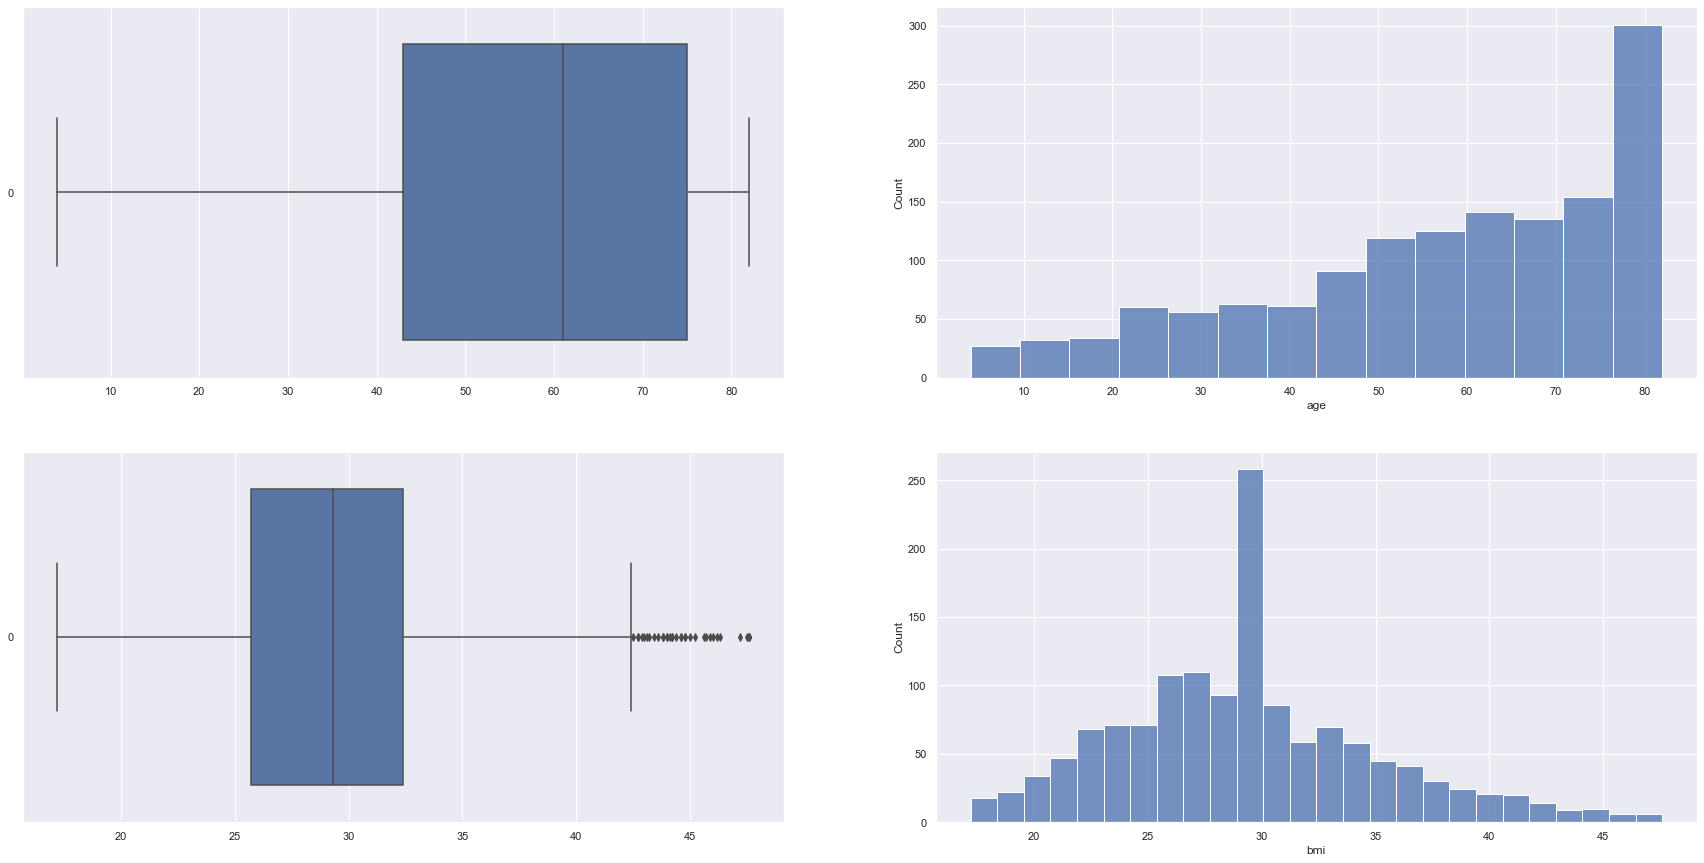

In [30]:
#Visualing the numeric variables
f,axes = plt.subplots(2, 2, figsize=(30, 15))

for i,val in enumerate(["age", "bmi"]):
    sb.boxplot(data = new[val], orient = "h", ax = axes[i][0])
    sb.histplot(data = new[val], ax = axes[i][1])

### Observations:

#### Age 
* There is a range of values between 3 to 83 years old. The median is 61, with lower quartile 45 and upper quartile 75
* We see that majority of the patients are senior citizens due to the high age 
* We will likely see an increase in number of predicted cardiovascular disease as the elderly are more prone to diseases

#### BMI:
* The healthy bmi range is 18.5—24.9
* The lower quartile is 25.6, the upper quartle is 32.2
* The median is 29, which is above the healthy BMI range
* This shows that about at least 75% of the patients are overweight for the stroke dataset

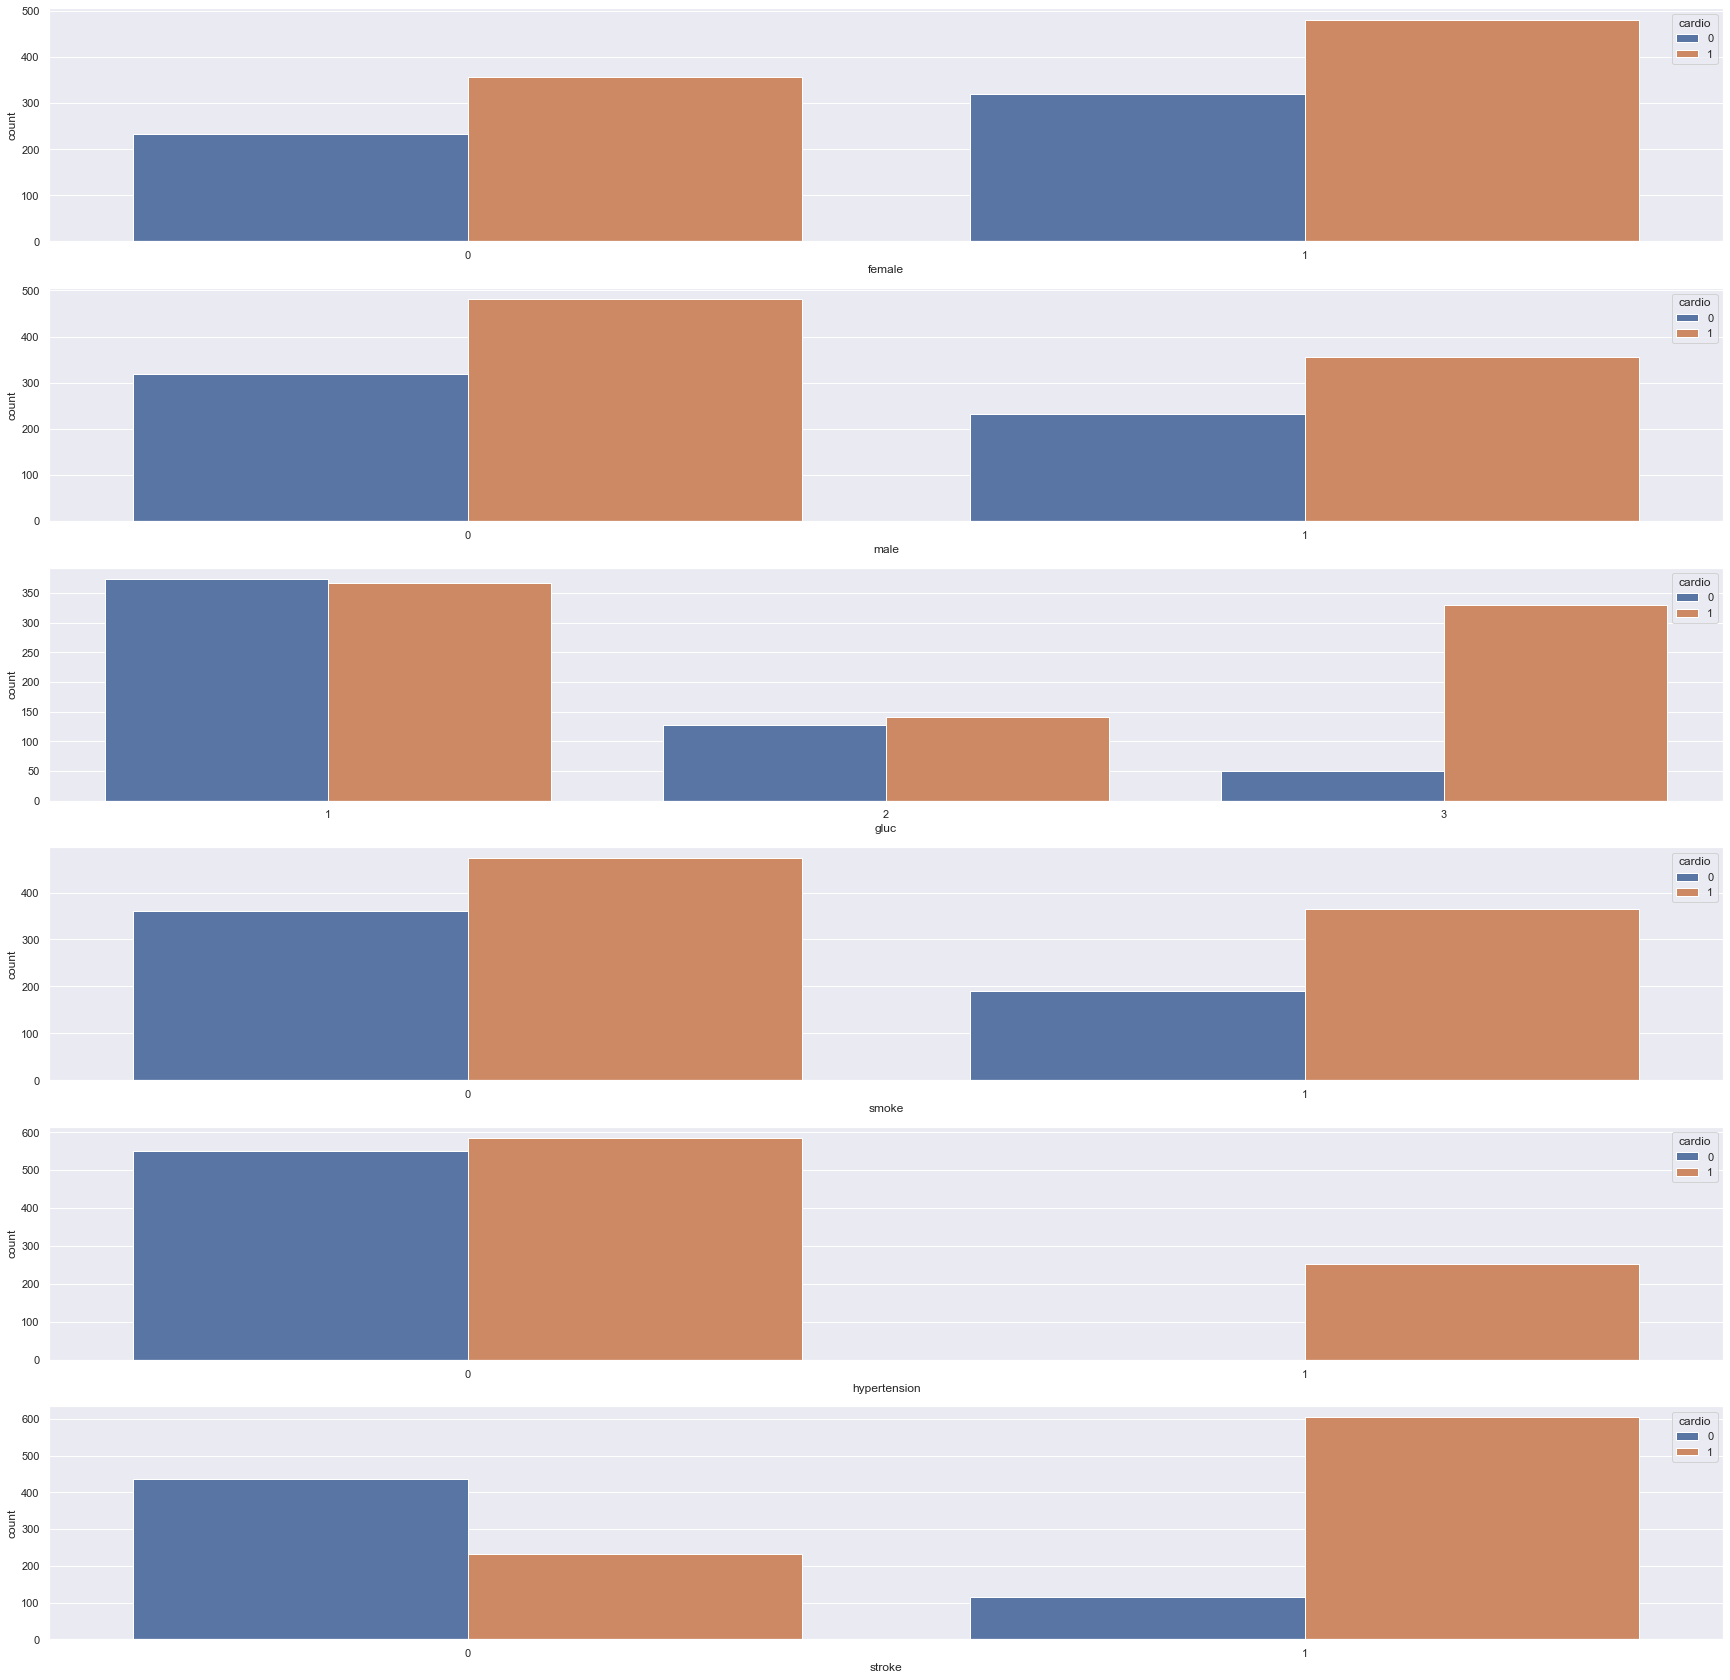

In [80]:
#Visualising the categorical variables against cardio
f ,axes = plt.subplots(6, 1, figsize=(30, 30))

for i,val in enumerate(["female", "male", "gluc", "smoke", "hypertension", "stroke"]):
    sb.countplot(x=val, hue="cardio", data=new, ax=axes[i]);

### Observations:

#### Gender
* There are more females than males in the stroke dataset. Additionally, the are more people that are predicted to have cardiovascular disease in both genders. This is supported from our previous observation of the majority of the patients being the elderly

#### Gluclose
* Patients who are within normal range(1) does not affect having cardiovascular disease, as there is an even distribution of patients with and without disease.
* However, patients who have are diabetic(3) are much more likely to have cardiovascular disease

#### Smoke
* We can see that smoking does not seem to affect having cardiovascular disease, as there are more patients having cardiovascular disease regardless of whether they smoke

#### Hypertension
* Patients without hypertension does not affect having cardiovascular disease.
* However, an interesting observation is that all the patients who have hypertension are predicted to have cardiovascular disease. This suggets that having hypertension may be an important factor that causes cardiovascular disease

#### Stroke
* We see that a large number of patients with stroke are predicted to have cardiovascular disease as well. This is also part of our aim of the project, where we will attempt to find a relationship between the two variables.

---

# Testing relationship between cardio and stroke

To better understand whether stroke and cardio are related to each other, a chi-square test can be used as an effective statistical tool.    

We will conduct a Chi-Square Test of Independence to test if two variables might be correlated or not.


## Defining null hypothesis and alternate hypothesis
> H₀ (Null Hypothesis)      — stroke and cardio are independent of each other   
> H₁ (Alternate Hypothesis) — stroke and cardio are dependent of each other   

Let significance level α = 0.05, we will draw our conclusions based on the following p-value conditions:
> p < 0.05 — We reject the null hypothesis, this means stroke and cardio are correlated    
> p > 0.05 — We accept the null hypothesis, this means stroke and cardio are not correlated    

In [81]:
targets = new.copy()
targets.drop(["age", "gluc", "smoke", "bmi", "hypertension", "female", "male"], axis=1, inplace=True)
targets

,stroke,cardio
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
1383,1,0
1384,1,1
1385,1,1
1386,1,1


In [82]:
contingency = pd.crosstab(targets['stroke'], targets['cardio'], margins= True)
contingency

cardio,0,1,All
stroke,,,
0,437,233,670
1,114,604,718
All,551,837,1388


In [83]:
from scipy.stats import chi2_contingency 

value = np.array([contingency.iloc[0][0:4].values,
                  contingency.iloc[1][0:4].values])
print(chi2_contingency(value)[0:3])

(352.55214995022885, 2.7814633814983584e-77, 2)


From above, 2.78146e-77 is the p-value, 352.55 is the statistical value and 2 is the degree of freedom.     
As the p-value is lesser than 0.05, we reject the NULL hypothesis. Therefore, we can conclude that stroke and cardio are related to each other.

---

## Finding out whether there is a causal relationship between stroke and cardio

Now that we see that the two variables are related, we want to go one step deeper to determine whether they may some kind of causal relationship between stroke and cardio. 

We will attempt to detect a causal relationship using Bayesian structure learning, through the `bnlearn` module

In [84]:
import bnlearn as bn

We form the directed acyclic graph (DAG) with the variables. We let E(p,t) imply that there is a dependency relationship between the predictor(p) and the target(t). Subsequently, we form 2 seperate models:
> cardio_stroke imply that the variable cardio causes stroke   
> stroke_cardio imply that the variable stroke causes cardio

We then calculate the conditional probability of (A|B) to find out the probability of one variable causing the other

In [85]:

predictors = ['age', 'hypertension', 'gluc', 'bmi', 'smoke', 'female', 'male']
targets = ['stroke', 'cardio']

edges = []

for i in predictors:
    for j in targets:
        edges.append((i, j))
        
cardio_stroke = edges.copy()
cardio_stroke.append(('cardio', 'stroke'))

stroke_cardio = edges.copy()
stroke_cardio.append(('stroke', 'cardio'))

In [86]:
DAG = bn.make_DAG(stroke_cardio)

model1 = bn.parameter_learning.fit(DAG, new, methodtype='bayes', verbose=0)

[bnlearn] >bayes DAG created.


In [87]:
#q1 - what is the probablity of having stroke given cardio?

q1 = bn.inference.fit(model1, variables=['cardio'], evidence={'stroke': 1})

print(q1.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+----+----------+----------+
|    |   cardio |        p |
+====+==========+==========+
|  0 |        0 | 0.496132 |
+----+----------+----------+
|  1 |        1 | 0.503868 |
+----+----------+----------+
   cardio         p
0       0  0.496132
1       1  0.503868


In [88]:
#q2 - what is the probablity of having cardio given stroke?

DAG = bn.make_DAG(cardio_stroke)

model2 = bn.parameter_learning.fit(DAG, new, methodtype='bayes', verbose=0)
q2 = bn.inference.fit(model2, variables=['stroke'], evidence={'cardio': 1})

print(q2.df)

[bnlearn] >bayes DAG created.
[bnlearn] >Variable Elimination..


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+----+----------+----------+
|    |   stroke |        p |
+====+==========+==========+
|  0 |        0 | 0.495956 |
+----+----------+----------+
|  1 |        1 | 0.504044 |
+----+----------+----------+
   stroke         p
0       0  0.495956
1       1  0.504044


### Observations:

From q1, we see that given someone has stroke, the probability that the person having cardio is 0.50.
From q2, we see that given someone has cardio, the probability that the person having stroke is 0.50. 

When a patient has either disease, there is a 50% chance that it will cause the other disease as well.

---

# Factors to reduce having cardiovascular disease

Now that we know the dangers of cardiovascular disease, our last step of the project is to find out what are the key factors that may lead to someone having cardiovascular disease. Therefore, we break down our model to find out the feature importance.

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

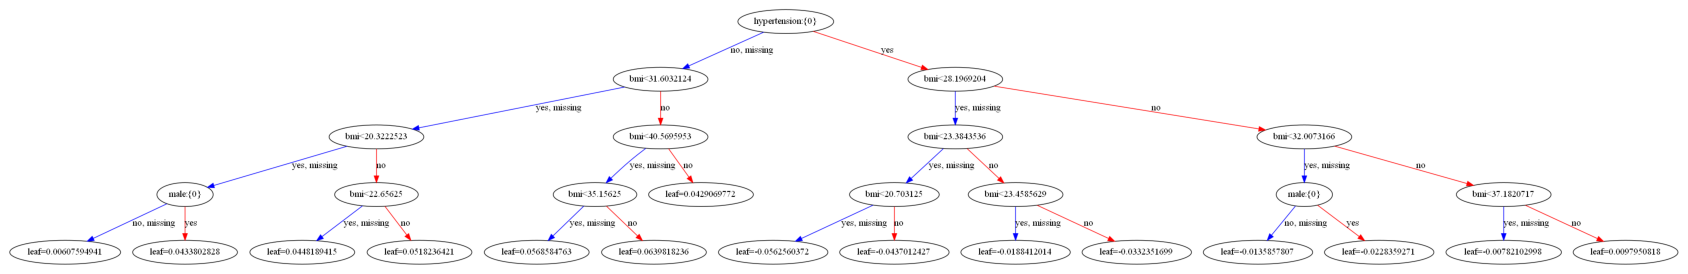

In [90]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(final_cl, ax=ax)
plt.show()

fig.set_size_inches(50, 25)
fig.savefig('tree.png')

### Observations:

From the diagram, we see that BMI is by far the biggest factor in determining whether a patient has heart disease. In fact, most of the branching in the tree uses BMI to decide. Hypertension is the first node in the tree, suggesting that it has relatively high importance as well. 


Lastly, we see that being male also affects having heart disease. This information is also support by online evidence.
According to Havard Medical school, "Researchers found that throughout life, men were about twice as likely as women to have a heart attack". 

---
### Other Evidence

BMI is the leading factor in causing heart disease. High BMI leads to factors such as obesity, which is a risk factor causing heart disease. According to John Hopkins Medicine, "Over 12 years, those who were the most obese (BMI of 35 or higher) developed the most heart failure."

Additionally, BMI is also a risk factor that causes stroke. According to Ochsner Lafayette General, Acadiana’s largest non-profit regional health system, "each unit increase in body mass index (BMI) increases the risk of stroke by 5 percent".    
This is also the reason the Health Promotion Board (HPB) is actively trying to promote healthy lifestyle amongst Singaporeans, to reduce obesity and reduce BMI within the healthy range.

Hypertension (High blood pressure) forces the heart to work harder to pump blood to the rest of the body, which increases the risk of heart attack. Therefore, it is logical that having hypertension leads to heart disease. Exercising regularly and having a healthy diet reduces the risk of having high blood pressure, which again stresses the importance of having a healthy lifestyle.

---

## Conclusion:

According to the U.S. Department of Health and Human Services, only 23% of American Adults aged 18-64 exercise a sufficient amount. 

Hence, all of us should take the time to exercise the recommended amount of at least 3 times a week. Even though Singaporeans have the 5th highest life expectancy in the world, we do not actively exercise. Part of the reason why Singapore is so healthy is because we have one of the best healthcare services in the world, and not because we exercise. According to the Bloomberg Health-Efficiency Index which tracks medical costs and value, it was found that Singapore was the 2nd most efficient country for health care, and Singaporeans only spent 4.3% on healthcare relative to GDP. Hence health care is extremely affordable to Singaporeans.

![title](img/bloomberg_healthcare_efficiency.jpeg)

On the bright side, it seems that more Singaporeans are starting to exercise. According to Data.gov.sg, the sports and phsyical activity participation level is slowly rising, and has increase from 54% to 69%. But Singapore still has a long way to go. 

| Annual        | Didn't participate past year           | Inactive  | Irregular | Regular
| :-------------: |:-------------:| :-----:| :-----:| :-----:|
| 2020   | 14% | 11% | 7% |69%
| 2019   | 21% |  7% | 6% | 66%
| 2018   | 22% |  7% | 6% |66% 
| 2017  | 19% |  7% | 7% |68% 
| 2016   | 25% |  7% | 6% |61% 
| 2015   | 29% |  9% | 7% |54% 


According to the Lancet Global Health, which features journals, People in Singapore have a high prevalence of insufficent physical activity at 36.5%. Hence, we still have a long way to go to improve our life expectancy. 



![title](img/male.jpeg)


